# MOwNiT - laboratorium 11
### Faktoryzacja QR

In [222]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [223]:
def qr(A):
    n = A.shape[0]
    Q = np.empty((n,n))
    R = np.zeros((n,n))
    
    u_k = A[:,0:1] / np.linalg.norm(A[:,0:1], axis=0)
    Q[:,0:1] = u_k
    R[0,0] = u_k.T @ A[:,0:1]
    for k in range(1,n):
        a_k = A[:,k:k+1]
        u_prev = Q[:,:k]
        projections = u_prev.T @ a_k
        R[:k,k:k+1] = projections
        u_k = a_k - np.sum(u_prev * projections.T, axis=1, keepdims=True)
        u_k = u_k / np.linalg.norm(u_k, axis=0)
        
        Q[:,k:k+1] = u_k
        R[k,k] = u_k.T @ a_k
    
    return Q, R

In [224]:
def qr_test(A):
    print("---")
    print(f"Matrix of size {A.shape}")
    
    start_time = time.time()
    my_q, my_r = qr(A)
    end_time = time.time()
    print(f"My implementation time: {end_time - start_time}s")
    
    start_time = time.time()
    q, r = np.linalg.qr(A)
    end_time = time.time()
    print(f"NumPy implementation time: {end_time - start_time}s")
    
    q_errs = np.abs(np.abs(my_q) - np.abs(q))
    q_ind = np.argmax(q_errs)
    q_relative_err = np.abs(q_errs.reshape(-1)[q_ind] / q.reshape(-1)[q_ind])
    print(f"Max Q relative error = {q_relative_err}")

In [225]:
qr_t1 = np.random.random((50,50))
qr_t2 = np.random.random((100,100))
qr_t3 = np.random.random((500,500))
qr_t4 = np.random.random((1000,1000))
qr_t5 = np.random.random((2000,2000))

test_suite = [qr_t1, qr_t2, qr_t3, qr_t4, qr_t5]

In [226]:
for A in test_suite:
    qr_test(A)

---
Matrix of size (50, 50)
My implementation time: 0.015619754791259766s
NumPy implementation time: 0.0019421577453613281s
Max Q relative error = 1.7780862295655456e-12
---
Matrix of size (100, 100)
My implementation time: 0.01654958724975586s
NumPy implementation time: 0.0009510517120361328s
Max Q relative error = 4.117333394442843e-12
---
Matrix of size (500, 500)
My implementation time: 0.10832524299621582s
NumPy implementation time: 0.005891561508178711s
Max Q relative error = 3.921220059393819e-08
---
Matrix of size (1000, 1000)
My implementation time: 0.835212230682373s
NumPy implementation time: 0.036103010177612305s
Max Q relative error = 1.2447256094153887e-08
---
Matrix of size (2000, 2000)
My implementation time: 7.881927251815796s
NumPy implementation time: 0.19865846633911133s
Max Q relative error = 8.217184169374337e-09


In [234]:
def rand_matrix_with_cond(size, cond):
    u, _ = np.linalg.qr(np.random.random((size, size)))
    v_t, _ = np.linalg.qr(np.random.random((size, size)))
    s = np.linspace(1, cond, size)
    return u @ np.diag(s) @ v_t

def check_with_identity(A):
    q, _ = qr(A)
    return np.linalg.cond(A), np.linalg.norm(np.identity(q.shape[0]) - q.T @ q)

In [250]:
id_test_suite = [rand_matrix_with_cond(8, 2**i) for i in range(1,51)]

x_i = []
y_i = []

for A in id_test_suite:
    cond, similarity = check_with_identity(A)
    x_i.append(cond)
    y_i.append(similarity)

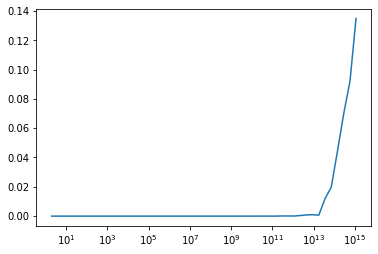

In [251]:
plt.xscale("log")
plt.plot(x_i, y_i)
plt.draw()

## def qr_solve(A, b):
    q, r = np.linalg.qr(A)
    return np.linalg.solve(r, q.T @ b)

In [211]:
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5]).reshape((11,1))
y = np.array([2,7,9,12,13,14,14,13,10,8,4]).reshape((11,1))

A = np.hstack([x**0, x**1, x**2])
print(A)

[[ 1 -5 25]
 [ 1 -4 16]
 [ 1 -3  9]
 [ 1 -2  4]
 [ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]
 [ 1  2  4]
 [ 1  3  9]
 [ 1  4 16]
 [ 1  5 25]]


In [212]:
print(qr_solve(A, y))

[[13.97202797]
 [ 0.18181818]
 [-0.43356643]]


In [213]:
c, b, a = qr_solve(A, y)

In [215]:
xs = np.linspace(-8,8,1000)
ys = []
for x_sample in xs:
    ys.append(a*x_sample**2 + b*x_sample + c)

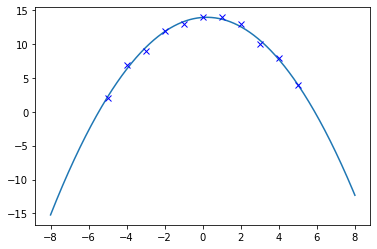

In [221]:
plt.plot(xs, ys)
plt.plot(x, y, "bx")
plt.draw()